# The Sparks Foundation - Data Science & Business Analytics Internship


### Batch  : May 2022

### Name  : Anushree K

### Task 3 : Exploratory Data Analysis-Retail

### Level   : Begginer

* Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

* As a business manager, try to find out the weak areas where you can work to make more profit.

* What all business problems you can derive by exploring the data?


Exploratory Data Analysis(EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations

__Dataset__ : https://bit.ly/3i4rbWl

###  Importing the necessary libraries for the task :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing The Dataset

In [2]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
 data.shape

(9994, 13)

 There are 9994 data points and a total of 13 columns.



In [4]:
# Checking the number of columns present
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
# Analyzing the datatypes of the objects
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# Analyzing the numerical attributes 
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Checking missing values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no missing values in the data sets


In [8]:
# Checking the dupilication in data
data.duplicated().sum()

17

In [9]:
# Checking for unique values of each attribute
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Since the 'Country' column has only one value of "United States" so we can drop it as we dont need any analysis to be done based on it.

In [10]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

Since the entire data is of one country(United States). Hence we can drop the column.

In [11]:
data.drop(["Country"],axis=1)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [12]:
data.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [13]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### Data Visualization

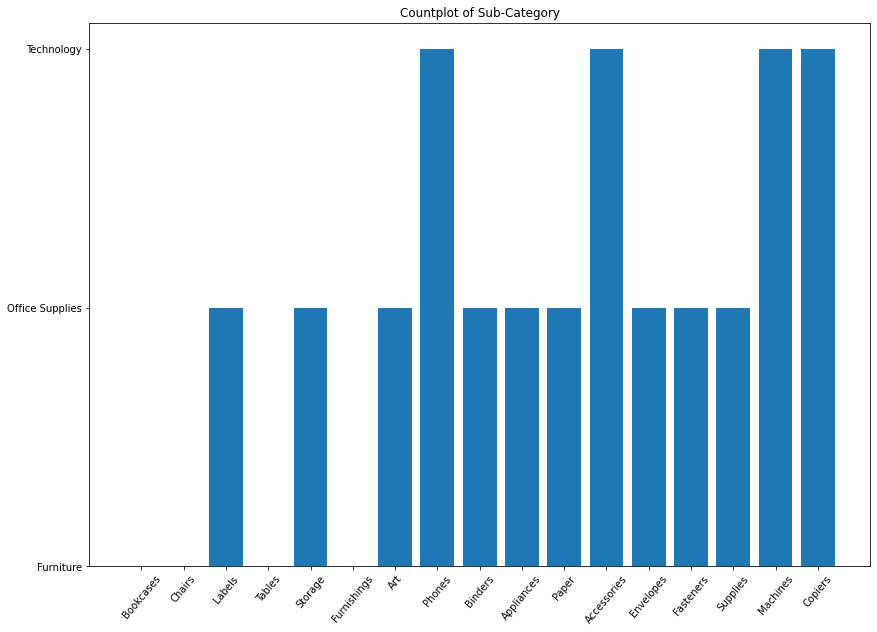

In [14]:
plt.figure(figsize=(14,10))
plt.bar('Sub-Category','Category',data=data)
plt.xticks(rotation=50)
plt.title("Countplot of Sub-Category")
plt.show()

Above graph gives a clear understanding of which sub-categories belongs to what category.


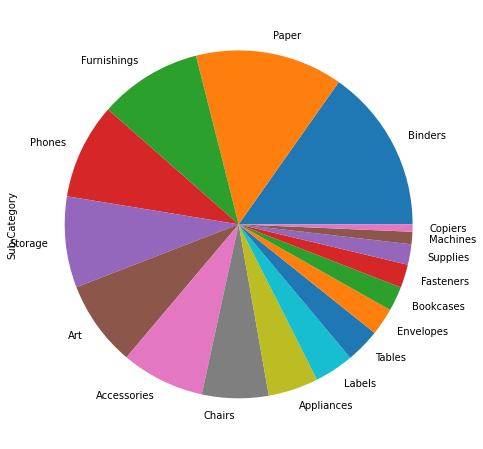

In [15]:
plt.figure(figsize=(16,8))
data["Sub-Category"].value_counts().plot.pie()
plt.show()

* From above we get to know Blinders,Paper, Furnishings, Phones, storage, art, accessories we sell at large.

* And we sell very minimum things like Copiers,Machine & suppliers

<Figure size 1440x1296 with 0 Axes>

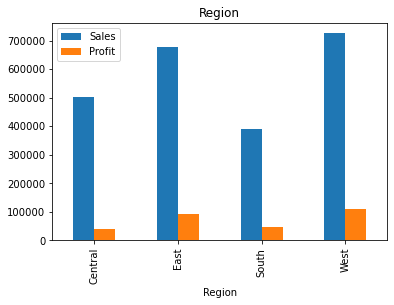

In [16]:
plt.figure(figsize=(20,18))
data.groupby(['Region'])['Sales','Profit'].sum().plot.bar()
plt.title("Region")
plt.show()

* South Region has lowest sales and profit among all other regions.

* West has higher sales and profit than other regions.

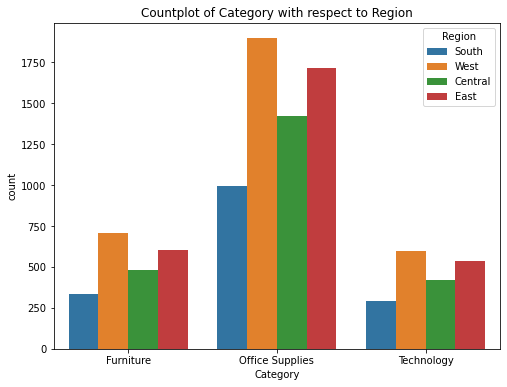

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x="Category", hue="Region", data=data)
plt.title("Countplot of Category with respect to Region")
plt.show()

Customers from side West tend to order more from superstores whereas the customers from east order the least.

<Figure size 1152x720 with 0 Axes>

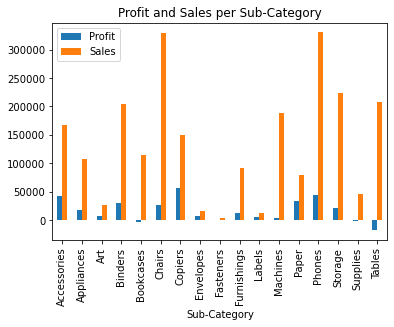

In [19]:
plt.figure(figsize=(16,10))
data.groupby('Sub-Category')['Profit','Sales'].sum().plot.bar()
plt.title('Profit and Sales per Sub-Category')
plt.show()

Copiers Have the highest profit while Selling price for Chairs and Phones are on a extremely higher side compared to other products.

Customers do not prefer to buy tables and Bookcases from stores hence there is a negative profit.

<AxesSubplot:xlabel='Region', ylabel='count'>

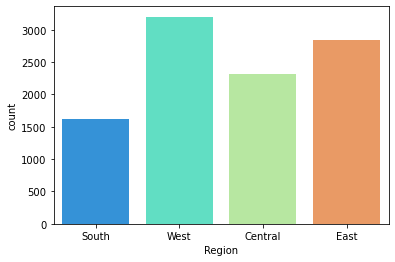

In [28]:
sns.countplot(x = 'Region',data = data,palette = 'rainbow')

From here we getting to know that store sell mainly in West & East region

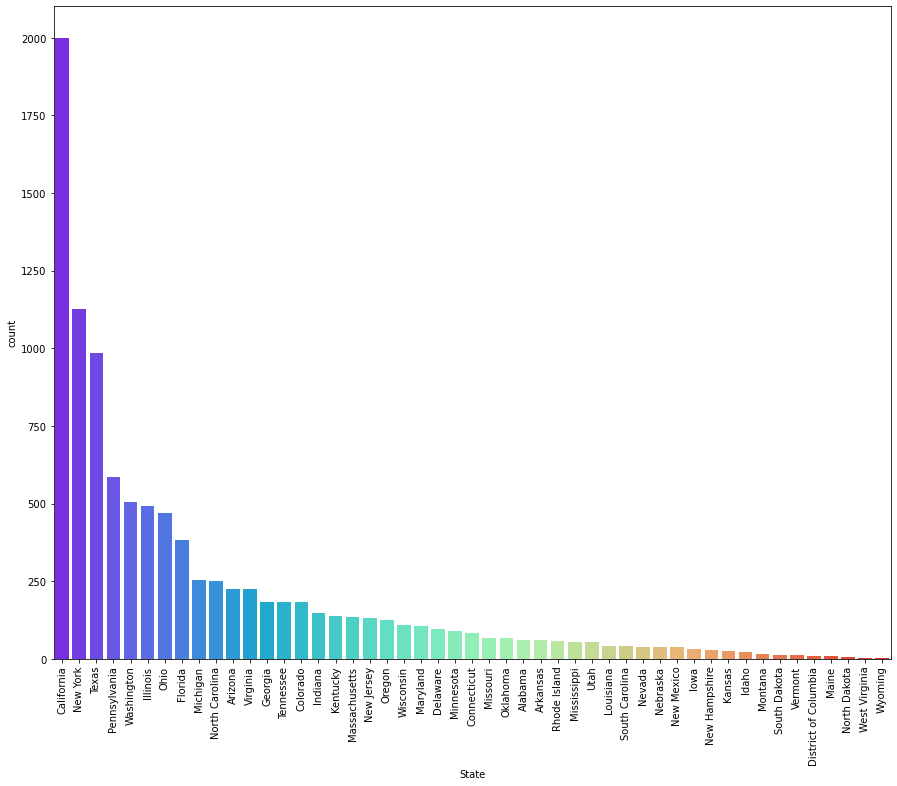

In [22]:
plt.figure(figsize = (15,12))
sns.countplot(x = 'State', data = data, palette = 'rainbow',order = data["State"].value_counts().index)
plt.xticks(rotation=90)
plt.show()


* Highest No of buyers are from California,NewYork and Texas

* lowest no of buyers are from West Virgnia and Wyoming

<AxesSubplot:xlabel='Segment', ylabel='count'>

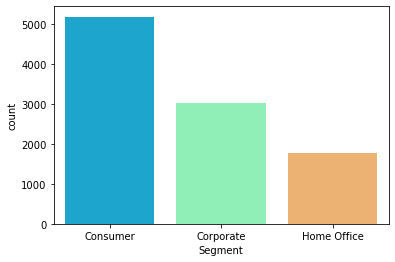

In [23]:
sns.countplot(x = 'Segment',data = data,palette = 'rainbow')

we deal with Consumer segment more as compared to other Corporate and Home office

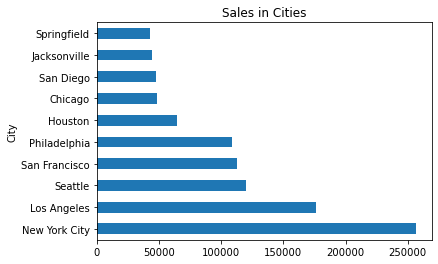

In [30]:
total_sales = data.groupby('City')['Sales'].sum()
top_10_city_sales = total_sales.sort_values(ascending = False).iloc[0:10]
top_10_city_sales.plot(kind = 'barh')
plt.title ('Sales in Cities')
plt.show()

Here we get to know that store sell most things to City like NewYork,Los Angeles,Seattle

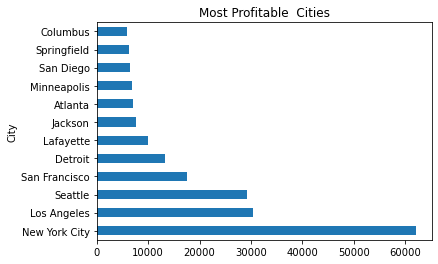

In [26]:
total_profit = data.groupby('City')['Profit'].sum()
top_10_profit = total_profit.sort_values(ascending = False).iloc[0:12]
top_10_profit.plot(kind = 'barh')
plt.title ('Most Profitable  Cities')
plt.show()

Here we get to know Most profitable cities for store is NewYork,Los Angeles,Seattle

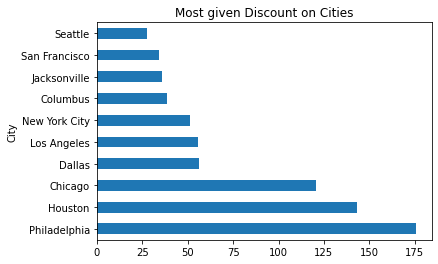

In [27]:
totalDiscount = data.groupby('City')['Discount'].sum()
top_10_Dis = totalDiscount.sort_values(ascending = False).iloc[0:10]
top_10_Dis.plot(kind = 'barh') 
plt.title('Most given Discount on Cities')
plt.show()

Here we get to know that we give more discount to cities like Philadelphia, Houston and Chicago 

We analyze now region column on the basis of shipment mode:

<Figure size 1296x864 with 0 Axes>

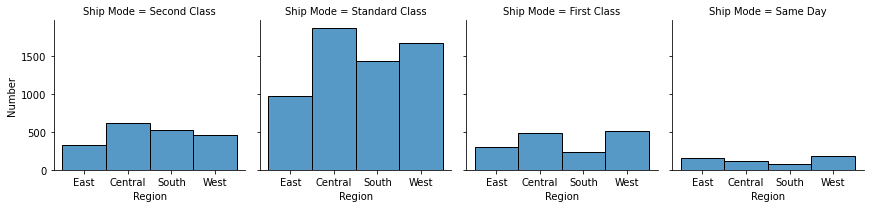

In [32]:
plt.figure(figsize = (18,12))
region_ship = sns.FacetGrid(data, col = 'Ship Mode')
region_ship.map(sns.histplot,'Region')
region_ship.set_ylabels('Number')
plt.show()

* central region people mostly use second class and standard class mode of shipment

* Were as West region people prefer First Class & Same Day ship mode mostly.

<Figure size 1080x1080 with 0 Axes>

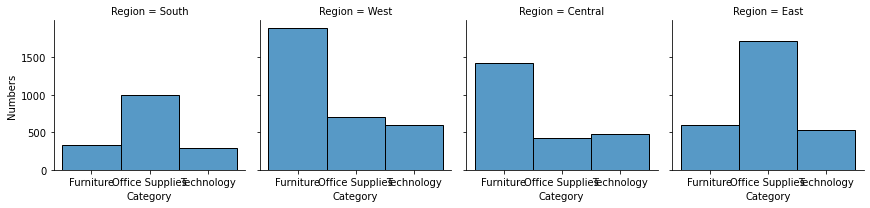

In [34]:
plt.figure(figsize = (15,15))
category = sns.FacetGrid(data, col = 'Region')
category.map(sns.histplot, 'Category')
category.set_ylabels("Numbers")

* On South region store mostly sell Office Supplies.

* On West region store mostly sell Furnitures.

* On Central region store mostly sell Furnitures.

* on East region store mostly sell Office Supplies.

<Figure size 1080x1080 with 0 Axes>

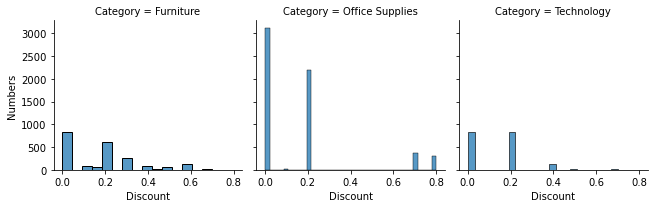

In [36]:
plt.figure(figsize = (15,15))
Discount = sns.FacetGrid(data, col = 'Category')
Discount.map(sns.histplot,'Discount')
Discount.set_ylabels("Numbers")

<Figure size 1080x1080 with 0 Axes>

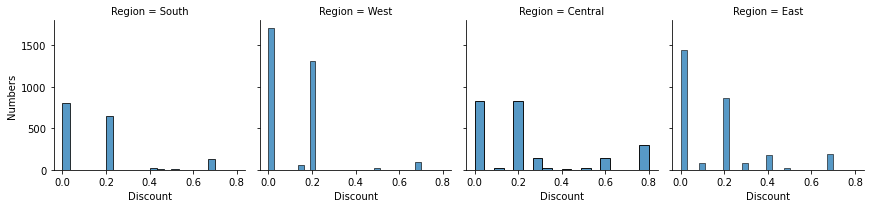

In [38]:
plt.figure(figsize = (15,15))
Discount = sns.FacetGrid(data, col = 'Region')
Discount.map(sns.histplot,'Discount')
Discount.set_ylabels("Numbers")

<Figure size 864x792 with 0 Axes>

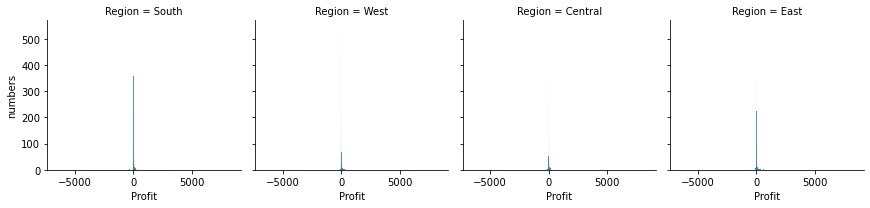

In [40]:
plt.figure(figsize = (12,11))
profitdf = sns.FacetGrid(data,col = 'Region')
profitdf.map(sns.histplot,'Profit')
profitdf.set_ylabels("numbers")
plt.show()

<Figure size 864x864 with 0 Axes>

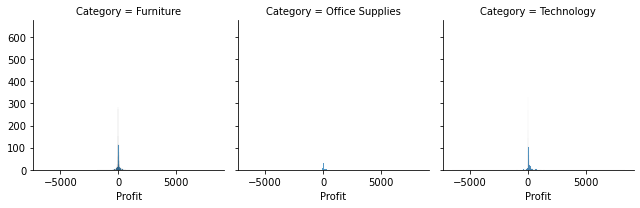

In [41]:
plt.figure(figsize= (12,12))
profit_ = sns.FacetGrid(data,col = 'Category')
profit_.map(sns.histplot,'Profit')
profit_set_ylabels = 'Numbers'
plt.show()

<Figure size 864x864 with 0 Axes>

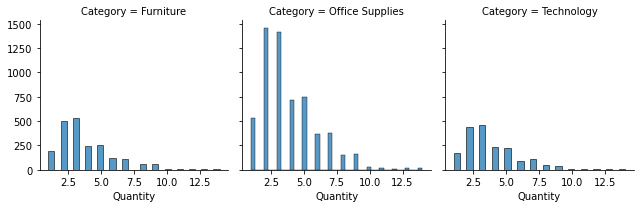

In [42]:
plt.figure(figsize = (12,12))
quan = sns.FacetGrid(data,col = 'Category')
quan.map(sns.histplot,"Quantity")
quan_set_labels = 'Numbers'
plt.show()

## Conclusion:


* Profits and sales are highly correlated.

* In category, Furniture has large no. of sales but instead of making profit, it makes loss. So, there is need to limit the sales of Furniture.

* States like California, NewYork, Washington,Michigan, Indiana, Virginia, Georgia makes good profit. So, sales can be increased in these states.

* States like Texas, Pennsylvania, Ohio and lllinosis has huge sales but it makes big loss. So, there is need to reduce the sales in these states and we have to give some good Discounts,and Great Deals to attract them. We need to work on this state.

* In sub-category Phones have high sales. 

### Thankyou